In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [50]:
data_15 = pd.read_csv('2015.csv')
data_16 = pd.read_csv('2016.csv')
data_17 = pd.read_csv('2017.csv')
#------------------------------#-----------------------------#------------------------
data_15 = data_15.drop(['Standard Error'], axis =1)
data_16 = data_16.drop(['Upper Confidence Interval','Lower Confidence Interval'], axis =1)
data_17 = data_17.drop(['Whisker.high','Whisker.low'], axis =1)
combine =[data_15,data_16,data_17]
#-------------------#----------------------------#----------------------#-----------------#---------------------
# clensing the data for 2017, so that it can be allined with 2015 and 2016 and renaming columns 
data_17 = data_17.reindex_axis(['Country', 'Happiness.Rank', 'Happiness.Score',
       'Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.',
       'Freedom', 'Trust..Government.Corruption.', 'Generosity',
       'Dystopia.Residual'], axis =1)
data_17 = data_17.rename(columns={'Happiness.Rank': 'Happiness Rank', 'Happiness.Score': 'Happiness Score',
       'Economy..GDP.per.Capita.':'Economy (GDP per Capita)' , 'Health..Life.Expectancy.':'Health (Life Expectancy)' ,
       'Trust..Government.Corruption.':'Trust (Government Corruption)',
       'Dystopia.Residual':'Dystopia Residual'})
data_15 = data_15.rename(columns={'Economy (GDP per Capita)': 'Economy', 'Health (Life Expectancy)': 'Health',
       'Happiness Score':'Score' , 'Happiness Rank':'Rank' ,
       'Trust (Government Corruption)':'Trust',
       'Dystopia Residual':'Residual'})
data_16 = data_16.rename(columns={'Economy (GDP per Capita)': 'Economy', 'Health (Life Expectancy)': 'Health',
       'Happiness Score':'Score' , 'Happiness Rank':'Rank' ,
       'Trust (Government Corruption)':'Trust',
       'Dystopia Residual':'Residual'})
data_17 = data_17.rename(columns={'Economy (GDP per Capita)': 'Economy', 'Health (Life Expectancy)': 'Health',
       'Happiness Score':'Score' , 'Happiness Rank':'Rank' ,
       'Trust (Government Corruption)':'Trust',
       'Dystopia Residual':'Residual'})
#-------------------------------#---------------------#-------------------------#------------------
#------------#-------------------------#------------------#------------------#-------------#-----------------
#changing the name for better clarification of the region name.
# 2017 doent have region column in the dataset
combine_new = [data_15,data_16]
for dataset in combine_new:
    dataset['Region'] = dataset['Region'].replace('Western Europe','WEur')
    dataset['Region'] = dataset['Region'].replace('North America','NA')
    dataset['Region'] = dataset['Region'].replace('Australia and New Zealand','ANZ')
    dataset['Region'] = dataset['Region'].replace('Middle East and Northern Africa','MENA')
    dataset['Region'] = dataset['Region'].replace('Latin America and Caribbean','LAC')
    dataset['Region'] = dataset['Region'].replace('Southeastern Asia','SAsia')
    dataset['Region'] = dataset['Region'].replace('Southern Asia','SAsia')
    dataset['Region'] = dataset['Region'].replace('Central and Eastern Europe','EEur')
    dataset['Region'] = dataset['Region'].replace('Eastern Asia','EAsia')
    dataset['Region'] = dataset['Region'].replace('Sub-Saharan Africa','SAfr')
    
#----------------#---------------------------------------#-------------------------------------
data_17['Health'].iloc[138] = 0.250657
data_15['Health'].iloc[122] = 0.342008
data_16['Health'].iloc[110] = 0.3944
#------------------------------------------------------------------------------------------------
#---------------#----------------------------#-------------------#-----------------#-----------------#-----------
# need to convert the float values to integer, so that the probablity density could be found out.
combine_new =[data_15,data_16]
data_15['Health'].iloc[23] = 9.0
data_15['Health'].iloc[71] = 9.0
for dataset in combine_new:
    dataset.loc[(dataset['Health'] < 0.1), 'Health'] = 0
    dataset.loc[(dataset['Health'] >= 0.1) & (dataset['Health'] < 0.2), 'Health'] = 1
    dataset.loc[(dataset['Health'] >= 0.2) & (dataset['Health'] < 0.3), 'Health'] = 2
    dataset.loc[(dataset['Health'] >= 0.3) & (dataset['Health'] < 0.4), 'Health'] = 3
    dataset.loc[(dataset['Health'] >= 0.4) & (dataset['Health'] < 0.5), 'Health'] = 4
    dataset.loc[(dataset['Health'] >= 0.5) & (dataset['Health'] < 0.6), 'Health'] = 5
    dataset.loc[(dataset['Health'] >= 0.6) & (dataset['Health'] < 0.7), 'Health'] = 6
    dataset.loc[(dataset['Health'] >= 0.7) & (dataset['Health'] < 0.8), 'Health'] = 7
    dataset.loc[(dataset['Health'] >= 0.8) & (dataset['Health'] < 0.9), 'Health'] = 8
    dataset.loc[(dataset['Health'] >= 0.9) & (dataset['Health'] < 1.0), 'Health'] = 9
    dataset['Health'] = dataset['Health'].astype(int)
#------------------#----------------------#-----------------------------#-------------------#-------
data_15['Economy'].iloc[119] = 0.05661
data_16['Economy'].iloc[75] = 0.022643


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


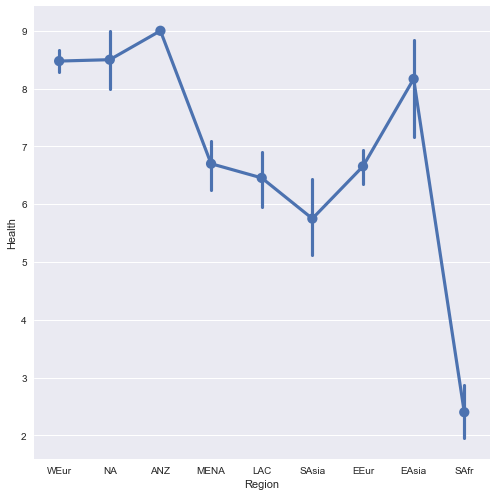

In [30]:
sns.factorplot(x='Region',y='Health',data= data_15,size=7)
plt.show()

In [48]:
data_16.Economy.unique()

array([ 1.44178 ,  1.52733 ,  1.42666 ,  1.57744 ,  1.40598 ,  1.44015 ,
        1.46468 ,  1.36066 ,  1.44443 ,  1.45181 ,  1.33766 ,  1.45038 ,
        1.50796 ,  1.06879 ,  1.35943 ,  1.44787 ,  1.08754 ,  1.42539 ,
        1.48341 ,  1.69752 ,  1.11508 ,  1.64555 ,  1.40283 ,  1.2167  ,
        1.18306 ,  1.15137 ,  1.30915 ,  1.57352 ,  1.18157 ,  1.30782 ,
        1.03032 ,  1.39488 ,  1.0893  ,  1.48953 ,  1.39729 ,  1.82427 ,
        1.34253 ,  1.05266 ,  0.83454 ,  1.09686 ,  1.61714 ,  1.44024 ,
        1.32572 ,  1.13367 ,  1.27973 ,  0.8737  ,  1.25142 ,  0.69384 ,
        0.73591 ,  1.35495 ,  0.97306 ,  0.87616 ,  1.38007 ,  1.22943 ,
        0.69177 ,  1.23228 ,  1.24585 ,  1.35948 ,  0.79422 ,  1.2692  ,
        1.13062 ,  1.31141 ,  1.29947 ,  0.99602 ,  1.08017 ,  1.14372 ,
        1.06688 ,  1.21788 ,  1.31857 ,  0.89373 ,  1.1697  ,  1.27964 ,
        0.89333 ,  1.18649 ,  1.5107  ,  0.022643,  0.90145 ,  1.16492 ,
        0.95104 ,  0.99673 ,  1.12373 ,  0.81217 , 

In [59]:
data_15.head(1)

,Country,Region,Rank,Score,Economy,Family,Health,Freedom,Trust,Generosity,Residual
0,Switzerland,WEur,1,7.587,1.39651,1.34951,9,0.66557,0.41978,0.29678,2.51738


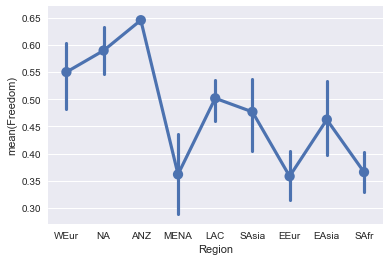

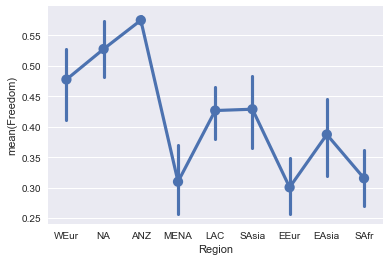

In [74]:
sns.pointplot(x= 'Region', y ='Freedom',data = data_15)
plt.show()
sns.pointplot(x= 'Region', y ='Freedom',data = data_16)
plt.show()